# Loan Data from Prosper
## by Paula Roigés

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style="darkgrid")

import datetime
import random

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
prosper_loans = pd.read_csv('prosperLoanData.csv')

In [3]:
print(prosper_loans.shape)
print(prosper_loans.dtypes)
print(prosper_loans.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [4]:
prosper_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
keys = ["ListingKey","ListingCreationDate","LoanOriginationDate","DateCreditPulled","ProsperRating (Alpha)","Term","ListingCategory (numeric)","LoanOriginalAmount","BorrowerAPR","EstimatedReturn","LoanStatus","StatedMonthlyIncome","IsBorrowerHomeowner","ProsperPrincipalBorrowed","ProsperPrincipalOutstanding"]

In [6]:
prosper_loans[keys].head()

,ListingKey,ListingCreationDate,LoanOriginationDate,DateCreditPulled,ProsperRating (Alpha),Term,ListingCategory (numeric),LoanOriginalAmount,BorrowerAPR,EstimatedReturn,LoanStatus,StatedMonthlyIncome,IsBorrowerHomeowner,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,2007-09-12 00:00:00,2007-08-26 18:41:46.780000000,NaN,36,0,9425,0.16516,NaN,Completed,3083.333333,True,NaN,NaN
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,2014-03-03 00:00:00,2014-02-27 08:28:14,A,36,2,10000,0.12016,0.05470,Current,6125.000000,False,NaN,NaN
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,2007-01-17 00:00:00,2007-01-02 14:09:10.060000000,NaN,36,0,3001,0.28269,NaN,Completed,2083.333333,False,NaN,NaN
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,2012-11-01 00:00:00,2012-10-22 11:02:32,A,36,16,10000,0.12528,0.06000,Current,2875.000000,True,NaN,NaN
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,2013-09-20 00:00:00,2013-09-14 18:38:44,D,36,2,15000,0.24614,0.09066,Current,9583.333333,True,11000.0,9947.9


In [7]:
prosper_df = prosper_loans[keys]

In [8]:
prosper_df.rename(columns={'ProsperRating (Alpha)': 'ProsperRating',"ListingCategory (numeric)":"ListingCategory"},inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


## <font color=#b30069> Assessment </font>

In [9]:
prosper_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey                     113937 non-null object
ListingCreationDate            113937 non-null object
LoanOriginationDate            113937 non-null object
DateCreditPulled               113937 non-null object
ProsperRating                  84853 non-null object
Term                           113937 non-null int64
ListingCategory                113937 non-null int64
LoanOriginalAmount             113937 non-null int64
BorrowerAPR                    113912 non-null float64
EstimatedReturn                84853 non-null float64
LoanStatus                     113937 non-null object
StatedMonthlyIncome            113937 non-null float64
IsBorrowerHomeowner            113937 non-null bool
ProsperPrincipalBorrowed       22085 non-null float64
ProsperPrincipalOutstanding    22085 non-null float64
dtypes: bool(1), float64(5), int64(3), object(6)
memory usage: 12.3+ MB


In [10]:
prosper_df.describe()

,Term,ListingCategory,LoanOriginalAmount,BorrowerAPR,EstimatedReturn,StatedMonthlyIncome,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding
count,113937.000000,113937.000000,113937.00000,113912.000000,84853.000000,1.139370e+05,22085.000000,22085.000000
mean,40.830248,2.774209,8337.01385,0.218828,0.096068,5.608026e+03,8472.311961,2930.313906
std,10.436212,3.996797,6245.80058,0.080364,0.030403,7.478497e+03,7395.507650,3806.635075
min,12.000000,0.000000,1000.00000,0.006530,-0.182700,0.000000e+00,0.000000,0.000000
25%,36.000000,1.000000,4000.00000,0.156290,0.074080,3.200333e+03,3500.000000,0.000000
50%,36.000000,1.000000,6500.00000,0.209760,0.091700,4.666667e+03,6000.000000,1626.550000
75%,36.000000,3.000000,12000.00000,0.283810,0.116600,6.825000e+03,11000.000000,4126.720000
max,60.000000,20.000000,35000.00000,0.512290,0.283700,1.750003e+06,72499.000000,23450.950000


In [11]:
prosper_df[(prosper_df["ProsperRating"].isnull()) & (prosper_df["ProsperPrincipalBorrowed"].notnull())]

,ListingKey,ListingCreationDate,LoanOriginationDate,DateCreditPulled,ProsperRating,Term,ListingCategory,LoanOriginalAmount,BorrowerAPR,EstimatedReturn,LoanStatus,StatedMonthlyIncome,IsBorrowerHomeowner,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding
46,0F8B34281015537050D4FEC,2008-08-05 19:42:49.197000000,2008-08-15 00:00:00,2008-08-05 19:36:35.233000000,NaN,36,1,4000,0.17170,NaN,Completed,3166.666667,False,6000.0,4317.11
78,0DFE3425061927556BB8A75,2008-06-29 23:23:40.157000000,2008-07-08 00:00:00,2008-06-29 23:13:04.860000000,NaN,36,3,4800,0.18454,NaN,Chargedoff,0.000000,True,7750.0,6725.84
101,0F6A3407615179140F880BF,2007-12-23 12:09:24,2008-01-08 00:00:00,2007-12-23 11:58:02.563000000,NaN,36,1,2932,0.20421,NaN,Chargedoff,7416.666667,True,25000.0,21862.26
127,10F83416199324455232962,2008-03-13 12:04:51.623000000,2008-03-21 00:00:00,2008-03-11 11:47:42.457000000,NaN,36,1,2551,0.29743,NaN,Chargedoff,2946.666667,False,5550.0,2331.40
150,10683423770994576084943,2008-06-12 11:59:55.217000000,2010-05-19 00:00:00,2010-05-07 09:12:07,NaN,36,7,6500,0.08641,NaN,Completed,5833.333333,True,17500.0,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113803,DEA93427782854712C73CB8,2008-08-01 01:42:00.820000000,2008-08-12 00:00:00,2008-08-01 01:40:12.270000000,NaN,36,7,5000,0.11293,NaN,Defaulted,0.000000,True,1000.0,724.82
113804,DEB2341377319696802F2FD,2008-02-16 19:23:45.313000000,2008-02-26 00:00:00,2008-01-20 19:49:32.797000000,NaN,36,1,5000,0.26140,NaN,Completed,13333.333333,False,5000.0,4336.45
113843,DF1B34173558923433980EF,2008-04-08 18:49:03.347000000,2008-04-15 00:00:00,2008-04-07 19:37:12.623000000,NaN,36,3,6001,0.15629,NaN,Completed,3250.000000,False,2000.0,1702.14
113915,D2053427325575423785798,2008-07-29 05:22:29.390000000,2008-08-06 00:00:00,2008-07-23 07:48:01.427000000,NaN,36,7,3000,0.22237,NaN,Completed,4416.666667,True,6001.0,0.00


In [12]:
prosper_df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

### Quality issues

- Change CreationDate, LoanCreationDate and CreditLinePulled to datetime objects
- Boolean index columns after July 2009 and store in post_july due to variables to analyse are populated after that date

## Cleaning

**Define**

Trucate *ListingCreationDate*, and change dates to proper date type for *ListingCreationDate*, *LoanOriginationDate* and *DateCreditPulled*

**Code**

In [13]:
prosper_loans_clean = prosper_df.copy()

In [14]:
prosper_loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey                     113937 non-null object
ListingCreationDate            113937 non-null object
LoanOriginationDate            113937 non-null object
DateCreditPulled               113937 non-null object
ProsperRating                  84853 non-null object
Term                           113937 non-null int64
ListingCategory                113937 non-null int64
LoanOriginalAmount             113937 non-null int64
BorrowerAPR                    113912 non-null float64
EstimatedReturn                84853 non-null float64
LoanStatus                     113937 non-null object
StatedMonthlyIncome            113937 non-null float64
IsBorrowerHomeowner            113937 non-null bool
ProsperPrincipalBorrowed       22085 non-null float64
ProsperPrincipalOutstanding    22085 non-null float64
dtypes: bool(1), float64(5), int64(3), object(6)
memory usage: 12.3+ MB


In [15]:
prosper_loans_clean['ListingCreationDate'].head()

0    2007-08-26 19:09:29.263000000
1    2014-02-27 08:28:07.900000000
2    2007-01-05 15:00:47.090000000
3    2012-10-22 11:02:35.010000000
4    2013-09-14 18:38:39.097000000
Name: ListingCreationDate, dtype: object

In [16]:
def truncate_extra(row):
    if len(row.ListingCreationDate)==29:
        return row.ListingCreationDate[:-10]
    else:
        return row.ListingCreationDate

In [17]:
#Since this is empty, we have successfully truncated our strings
prosper_loans_clean.ListingCreationDate = prosper_loans_clean.apply(truncate_extra,axis=1)
prosper_loans_clean[prosper_loans_clean.ListingCreationDate.str.len()!=19]

,ListingKey,ListingCreationDate,LoanOriginationDate,DateCreditPulled,ProsperRating,Term,ListingCategory,LoanOriginalAmount,BorrowerAPR,EstimatedReturn,LoanStatus,StatedMonthlyIncome,IsBorrowerHomeowner,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding


In [18]:
prosper_loans_clean[prosper_loans_clean.ListingCreationDate.str.len()!=19]['ListingCreationDate']
prosper_loans_clean.ListingCreationDate = prosper_loans_clean.ListingCreationDate.apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [19]:
prosper_loans_clean['LoanOriginationDate'].head()

0    2007-09-12 00:00:00
1    2014-03-03 00:00:00
2    2007-01-17 00:00:00
3    2012-11-01 00:00:00
4    2013-09-20 00:00:00
Name: LoanOriginationDate, dtype: object

In [20]:
prosper_loans_clean['LoanOriginationDate'] = pd.to_datetime(prosper_loans_clean.LoanOriginationDate)
prosper_loans_clean['LoanOriginationDate'] = prosper_loans_clean.LoanOriginationDate.dt.floor('s')

In [21]:
prosper_loans_clean['DateCreditPulled'].head()

0    2007-08-26 18:41:46.780000000
1              2014-02-27 08:28:14
2    2007-01-02 14:09:10.060000000
3              2012-10-22 11:02:32
4              2013-09-14 18:38:44
Name: DateCreditPulled, dtype: object

In [22]:
prosper_loans_clean['DateCreditPulled'] = pd.to_datetime(prosper_loans_clean.DateCreditPulled)
prosper_loans_clean['DateCreditPulled'] = prosper_loans_clean.DateCreditPulled.dt.floor('s')

**Test**

In [23]:
prosper_loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey                     113937 non-null object
ListingCreationDate            113937 non-null datetime64[ns]
LoanOriginationDate            113937 non-null datetime64[ns]
DateCreditPulled               113937 non-null datetime64[ns]
ProsperRating                  84853 non-null object
Term                           113937 non-null int64
ListingCategory                113937 non-null int64
LoanOriginalAmount             113937 non-null int64
BorrowerAPR                    113912 non-null float64
EstimatedReturn                84853 non-null float64
LoanStatus                     113937 non-null object
StatedMonthlyIncome            113937 non-null float64
IsBorrowerHomeowner            113937 non-null bool
ProsperPrincipalBorrowed       22085 non-null float64
ProsperPrincipalOutstanding    22085 non-null float64
dtypes: bool(1), datetime64[ns](3), float64(5), int64(3), o

In [24]:
prosper_loans_clean['DateCreditPulled'].head()

0   2007-08-26 18:41:46
1   2014-02-27 08:28:14
2   2007-01-02 14:09:10
3   2012-10-22 11:02:32
4   2013-09-14 18:38:44
Name: DateCreditPulled, dtype: datetime64[ns]

In [25]:
prosper_loans_clean['LoanOriginationDate'].head()

0   2007-09-12
1   2014-03-03
2   2007-01-17
3   2012-11-01
4   2013-09-20
Name: LoanOriginationDate, dtype: datetime64[ns]

In [26]:
prosper_loans_clean['ListingCreationDate'].head()

0   2007-08-26 19:09:29
1   2014-02-27 08:28:07
2   2007-01-05 15:00:47
3   2012-10-22 11:02:35
4   2013-09-14 18:38:39
Name: ListingCreationDate, dtype: datetime64[ns]

**Define**

Boolean index columns after July 2009 and store in a new df.

**Code**

In [27]:
pl_df = prosper_loans_clean[prosper_loans_clean.ListingCreationDate.dt.date>datetime.date(2009, 7, 31)]

**Test**

In [28]:
pl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84672 entries, 1 to 113936
Data columns (total 15 columns):
ListingKey                     84672 non-null object
ListingCreationDate            84672 non-null datetime64[ns]
LoanOriginationDate            84672 non-null datetime64[ns]
DateCreditPulled               84672 non-null datetime64[ns]
ProsperRating                  84672 non-null object
Term                           84672 non-null int64
ListingCategory                84672 non-null int64
LoanOriginalAmount             84672 non-null int64
BorrowerAPR                    84672 non-null float64
EstimatedReturn                84672 non-null float64
LoanStatus                     84672 non-null object
StatedMonthlyIncome            84672 non-null float64
IsBorrowerHomeowner            84672 non-null bool
ProsperPrincipalBorrowed       19682 non-null float64
ProsperPrincipalOutstanding    19682 non-null float64
dtypes: bool(1), datetime64[ns](3), float64(5), int64(3), object(3)
mem

In [29]:
# descriptive statistics for numeric variables
print(pl_df.describe())

               Term  ListingCategory  LoanOriginalAmount   BorrowerAPR  \
count  84672.000000     84672.000000        84672.000000  84672.000000   
mean      42.500000         3.313468         9094.024341      0.226738   
std       11.648913         4.367400         6288.611188      0.079889   
min       12.000000         0.000000         1000.000000      0.049350   
25%       36.000000         1.000000         4000.000000      0.163610   
50%       36.000000         1.000000         7500.000000      0.219450   
75%       60.000000         3.000000        13750.000000      0.292540   
max       60.000000        20.000000        35000.000000      0.423950   

       EstimatedReturn  StatedMonthlyIncome  ProsperPrincipalBorrowed  \
count     84672.000000         8.467200e+04              19682.000000   
mean          0.096093         5.933452e+03               8769.141547   
std           0.030364         8.247730e+03               7546.056759   
min          -0.182700         0.000000e+

In [33]:
# Prosper ranting value_counts

pl_df['ProsperRating'].value_counts(sort=True)

C     18303
B     15566
A     14510
D     14249
E      9781
HR     6924
AA     5339
Name: ProsperRating, dtype: int64

In [34]:
# Prosper Listing Category value_counts

pl_df['ListingCategory'].value_counts(sort=True) 

1     53085
7      9180
2      6783
3      5286
6      2230
13     1996
15     1522
18      885
14      876
20      771
19      768
16      304
5       263
11      217
8       199
10       91
9        85
12       59
17       52
0        20
Name: ListingCategory, dtype: int64

In [35]:
# Prosper Loan Status value_counts

pl_df['LoanStatus'].value_counts(sort=True) 

Current                   56576
Completed                 19501
Chargedoff                 5326
Defaulted                   997
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [36]:
# Prosper Is Borrower Homeowner value_counts

pl_df['IsBorrowerHomeowner'].value_counts(sort=True) 

True     44747
False    39925
Name: IsBorrowerHomeowner, dtype: int64

In [30]:
# Store data

pl_df.to_pickle('pl_df')

### What is the structure of your dataset?

There are 84,672 loans in this dataset from Prosper, and I will analyse 11 characteristics of these loans and the borrowers. The first approach determines that there are 7 different ratings: A-E, HR and AA, being C, B, A and D the most common rating between loans. 

Besides, there are several listing categories, having 1, 7, 2 and 3 the most common. Status of the loan, showing current, completes and chargeoff as the most common status of the loan and the days past due. The minimum term is 12 months, maximum 60 months and per average, 42 months.

Lastly, the original amount is per average of 9,094(€), presenting a minimum of 1,000(€) and maximum 35,000(€). The principal amount has a mean of 2,923(€), 0(€) minimum case and 23,450(€) as maximum.

### What is/are the main feature(s) of interest in your dataset?

I want to understand Prosper Customer Profile, how the different Borrower's Categories and Lenght of the loan affect the Risk of Default and, simultaneously, how this Risk of Default affects the Loan Return.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect to see the longest is the term of the loan, the higher is the risk of default. Altogether, the higher the risk, the more likely to do not get the loan return. Finally, I expect to see some pattern in ratings and listing distribution to understand how they affect to have a higher loan at risk of default.

## Univariate Exploration

Analising the distribution of main variables.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


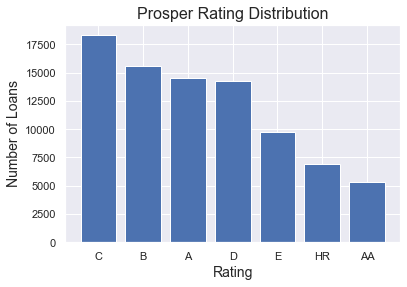

In [50]:
temp = pl_df[prosper_loans_clean.ListingCreationDate.dt.date>datetime.date(2009, 7, 31)].ProsperRating
plt.bar(temp.value_counts().index,temp.value_counts())
plt.title('Prosper Rating Distribution', fontsize = 16)
plt.ylabel('Number of Loans', fontsize = 14)
plt.xlabel('Rating', fontsize = 14);

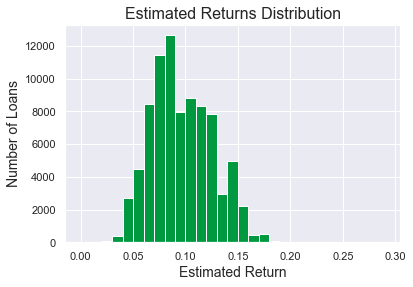

In [52]:
bin_edges=np.arange(0,max(pl_df['EstimatedReturn'].dropna())+0.01,0.01)
plt.hist(pl_df['EstimatedReturn'].dropna(), bins = bin_edges, color = '#009940')
plt.title('Estimated Returns Distribution', fontsize = 16)
plt.ylabel('Number of Loans', fontsize = 14)
plt.xlabel('Estimated Return', fontsize = 14);

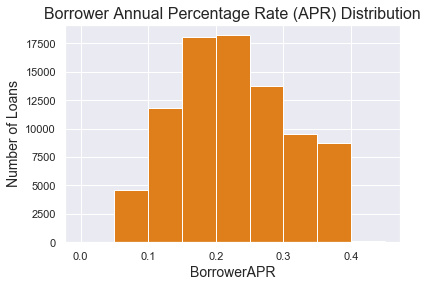

In [54]:
bin_edges=np.arange(0,max(pl_df["BorrowerAPR"])+0.05,0.05)
plt.hist(pl_df["BorrowerAPR"], bins=bin_edges, color = '#de7f1b')
plt.title('Borrower Annual Percentage Rate (APR) Distribution', fontsize = 16)
plt.ylabel('Number of Loans', fontsize = 14)
plt.xlabel('BorrowerAPR', fontsize = 14);

### Wealth Distribution

In [58]:
stated_income = pl_df[pl_df["StatedMonthlyIncome"]!=0]

In [59]:
stated_income["StatedMonthlyIncome"].describe()

count    8.398300e+04
mean     5.982130e+03
std      8.263893e+03
min      8.333300e-02
25%      3.500000e+03
50%      5.000000e+03
75%      7.122167e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [60]:
def classify(row):
    if row["StatedMonthlyIncome"]<2500:
        return 'Low'
    if row["StatedMonthlyIncome"]<8000:
        return 'Medium'
    else:
        return 'High'

In [61]:
stated_income["WageBracket"] = stated_income.apply(classify, axis=1);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


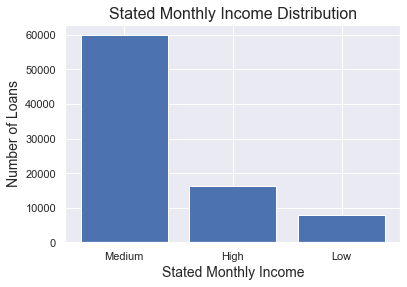

In [62]:
plt.bar(stated_income["WageBracket"].value_counts().index,stated_income["WageBracket"].value_counts())

plt.title('Stated Monthly Income Distribution', fontsize = 16)
plt.ylabel('Number of Loans', fontsize = 14)
plt.xlabel('Stated Monthly Income', fontsize = 14);

In [65]:
stated_income.groupby("WageBracket").size()

WageBracket
High      16328
Low        7759
Medium    59896
dtype: int64

In [66]:
59896/(16328 + 7759 + 59896)

0.7131919555148065

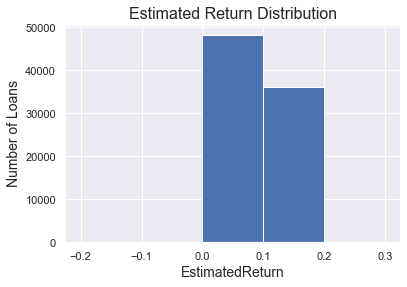

In [68]:
bin_edges=np.arange(-0.2,max(pl_df["EstimatedReturn"])+0.1,0.1)
plt.hist(pl_df["EstimatedReturn"],bins=bin_edges)
plt.title('Estimated Return Distribution', fontsize = 16)
plt.ylabel('Number of Loans', fontsize = 14)
plt.xlabel('EstimatedReturn', fontsize = 14);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

As previously seen, rating C, B and A are the most common. For Estimated Return and BorrowerAPR, we have a normal distribution with some peaks between 0.05 and 0.10 for estimated return, and 0.2 for borrowerAPR.


## Bivariate Exploration

To start off with, I want to look at the correlations present between features in the data.

In [69]:
numeric_vars = ['Term', 'ListingCategory', 'LoanOriginalAmount', 'BorrowerAPR', 'EstimatedReturn', 'StatedMonthlyIncome', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding']
categoric_vars = ['ProsperRating', 'LoanStatus', 'IsBorrowerHomeowner']

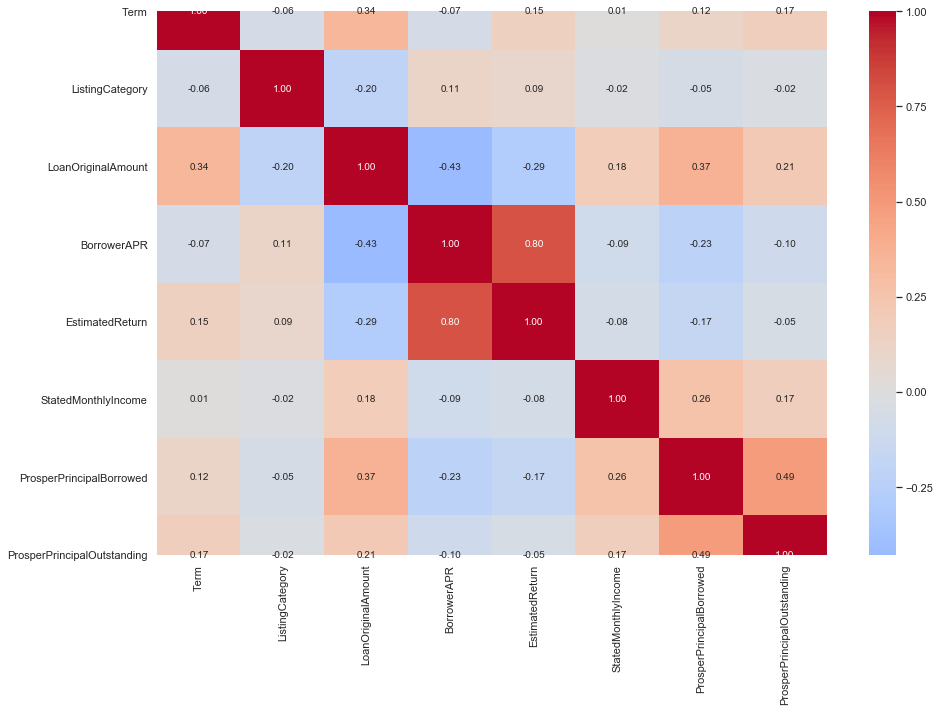

In [145]:
# correlation plot
plt.figure(figsize = [15, 10])
sns.heatmap(pl_df[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'coolwarm', center = 0)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


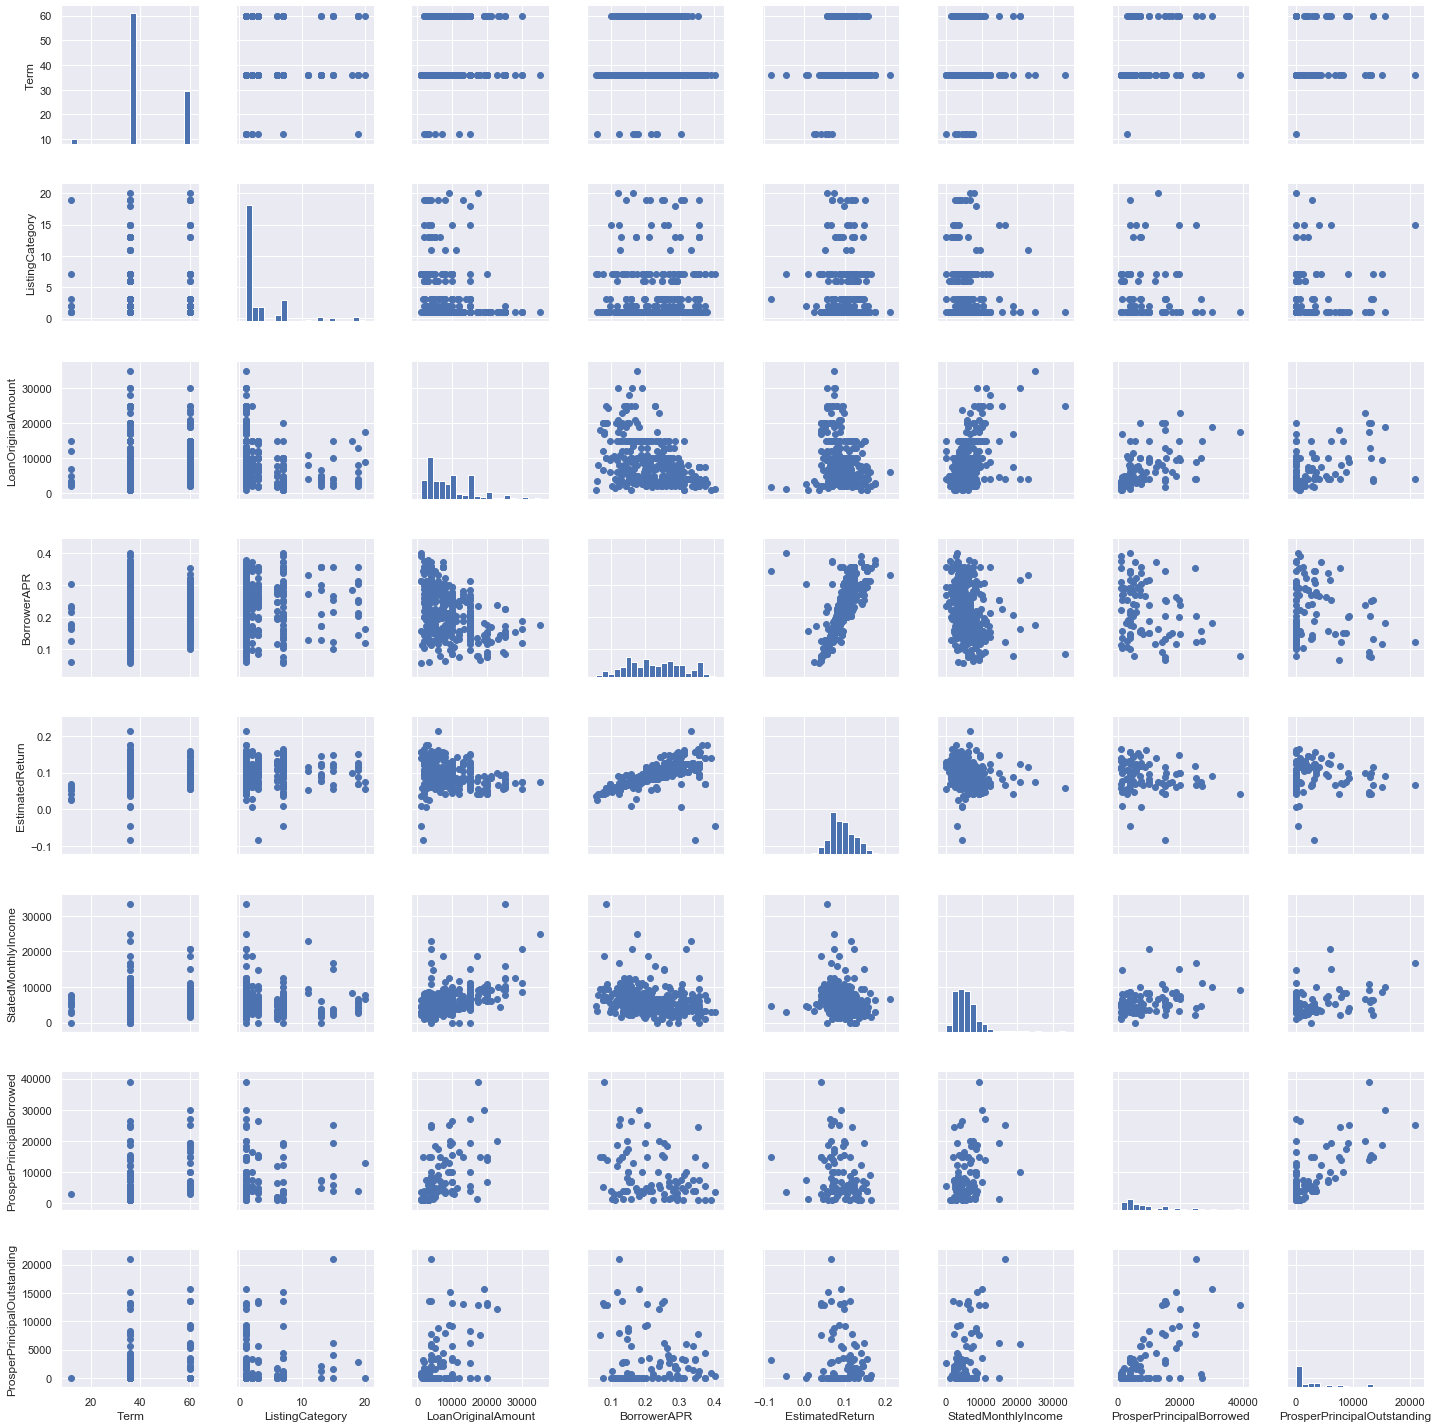

In [73]:
# plot matrix: sample 500 loans so that plots are clearer and
# they render faster
samples = np.random.choice(pl_df.shape[0], 500, replace = False)
loans_samp = pl_df.loc[samples,:]

g = sns.PairGrid(data = loans_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

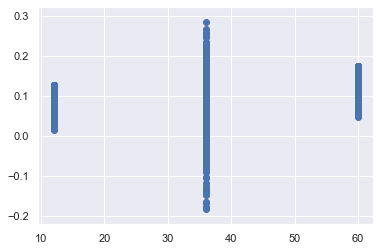

In [77]:
plt.scatter(pl_df["Term"],pl_df["EstimatedReturn"])

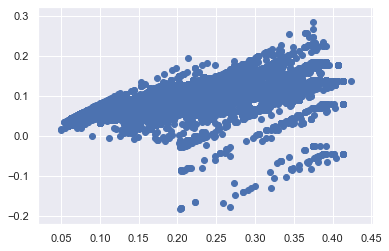

In [78]:
plt.scatter(pl_df["BorrowerAPR"],pl_df["EstimatedReturn"])

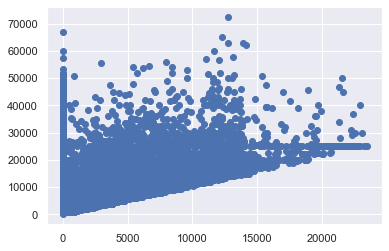

In [143]:
plt.scatter(pl_df["ProsperPrincipalOutstanding"],pl_df["ProsperPrincipalBorrowed"])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1080x720 with 0 Axes>

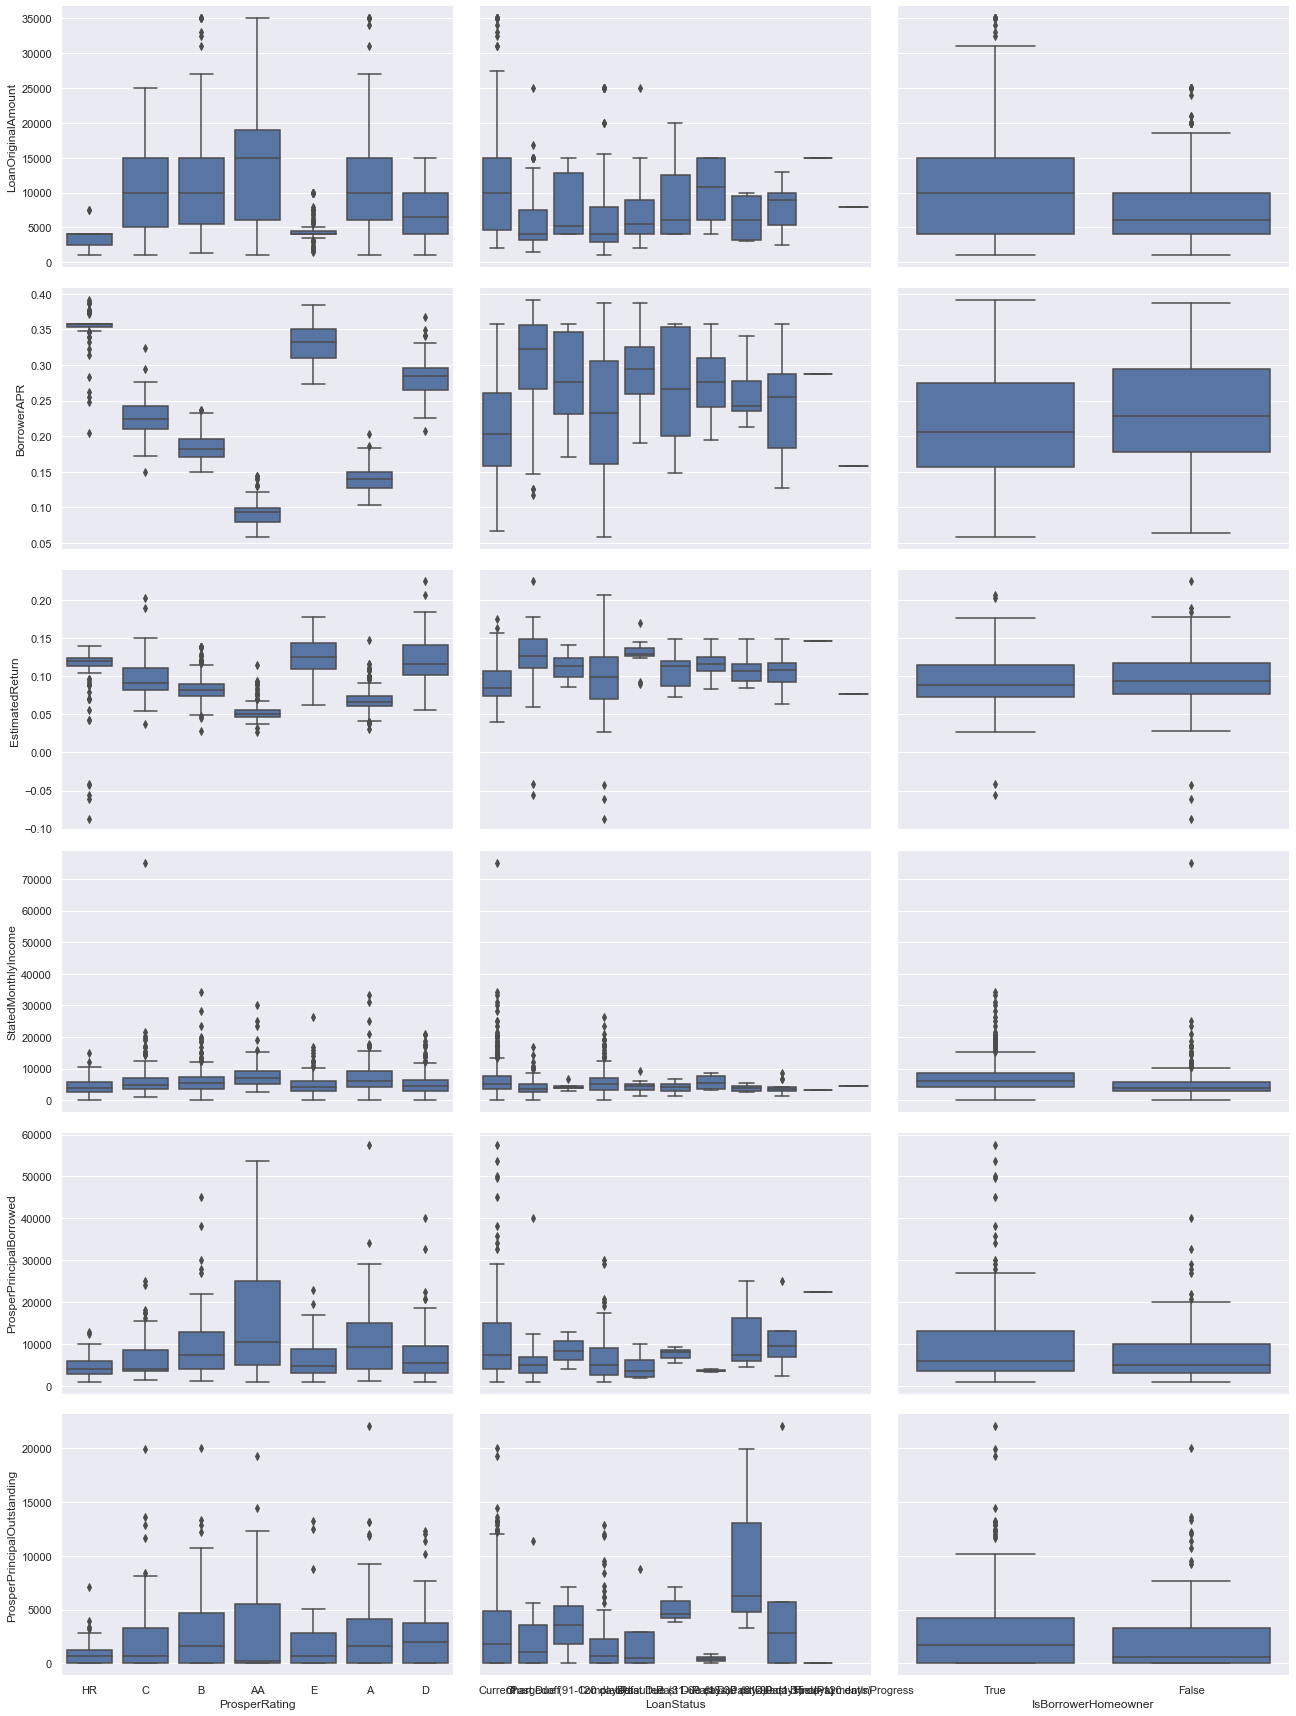

In [129]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(pl_df.shape[0], 2000, replace = False)
loan_samp = pl_df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [15, 10])
g = sns.PairGrid(data = loan_samp, y_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'EstimatedReturn', 'StatedMonthlyIncome', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding'], x_vars = categoric_vars,
                size = 4, aspect = 1.5)
g.map(boxgrid)
plt.show();

In [79]:
np.corrcoef(pl_df["BorrowerAPR"],pl_df["EstimatedReturn"])[1,0]

0.7951281733149883

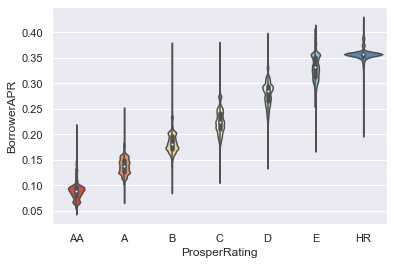

In [140]:
sns.violinplot(data = pl_df, x='ProsperRating',y = 'BorrowerAPR', order = ['AA','A','B','C','D','E','HR'], palette="RdYlBu")

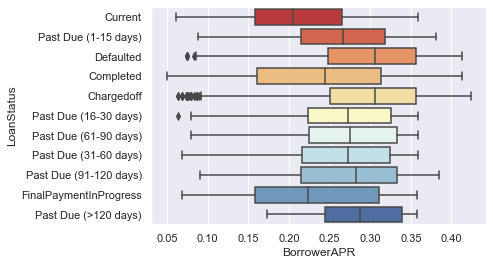

In [139]:
sns.boxplot(data = pl_df, y='LoanStatus',x = 'BorrowerAPR', palette="RdYlBu")

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The correlation matrix indicates there is a strong positive relationship of 0.8 between BorrowerAPR and the Estimated Return, meaning the higher is the Annual Percentage Rate of a borrower, greater is the Estimated Return.

Besides, there is a weak correlation between Loan original Amount and Principal Borrowed (0.4), Term (0.3), Borrower APR(-0.4) and Estimated Return (-0.3).

It is worth to mention the number of outliers that Charge off and Defaulted status have located for Borrower APR lower than 0.10.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


We can observe a moderate uphill correlation of 0.5 between Principal Outstanding and Principal Borrowed, pointing that the greater is one amount, there is a moderated increase in the other variable. 

## Multivariate Exploration

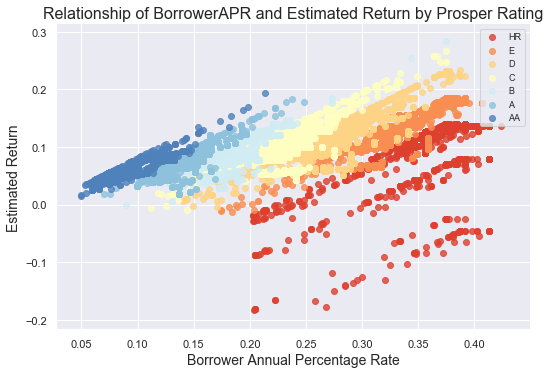

In [138]:
g = sns.FacetGrid(data = pl_df, hue = 'ProsperRating', hue_order = ['HR','E','D','C','B','A','AA'], size = 5, aspect = 1.5, palette="RdYlBu")
g.map(sns.regplot,"BorrowerAPR", "EstimatedReturn", fit_reg = False);
plt.legend(loc=1, fontsize = 9)
plt.title('Relationship of BorrowerAPR and Estimated Return by Prosper Rating', fontsize = 16)
plt.ylabel('Estimated Return', fontsize = 14)
plt.xlabel('Borrower Annual Percentage Rate', fontsize = 14);

In [152]:
finished_loans = pl_df[(pl_df["LoanStatus"]=="Chargedoff") | (pl_df["LoanStatus"]=="Completed") | (pl_df["LoanStatus"]=="Defaulted") | (pl_df["LoanStatus"]=="Chargedoff") | (pl_df["LoanStatus"]=="FinalPaymentInProgresss")]

In [153]:
denom = finished_loans.groupby(['ListingCategory']).size()

In [154]:
finished_loans.groupby(["ListingCategory","LoanStatus"]).size()

ListingCategory  LoanStatus
0                Completed        7
1                Chargedoff    2454
                 Completed     9667
                 Defaulted      524
2                Chargedoff     522
                 Completed     1985
                 Defaulted       87
3                Chargedoff     592
                 Completed     1654
                 Defaulted      108
5                Chargedoff      34
                 Completed      221
                 Defaulted        8
6                Chargedoff     211
                 Completed      950
                 Defaulted       36
7                Chargedoff     971
                 Completed     3587
                 Defaulted      170
8                Chargedoff      13
                 Completed       27
9                Chargedoff       3
                 Completed       25
10               Chargedoff       9
                 Completed       34
                 Defaulted        1
11               Chargedoff       6


In [155]:
lcounts =  finished_loans.groupby(["ListingCategory","LoanStatus"]).size()
lprops = lcounts / denom
lprops = lprops.reset_index(name='count')
lprops = lprops.pivot_table(index='LoanStatus',columns='ListingCategory',values = 'count', fill_value = 0)

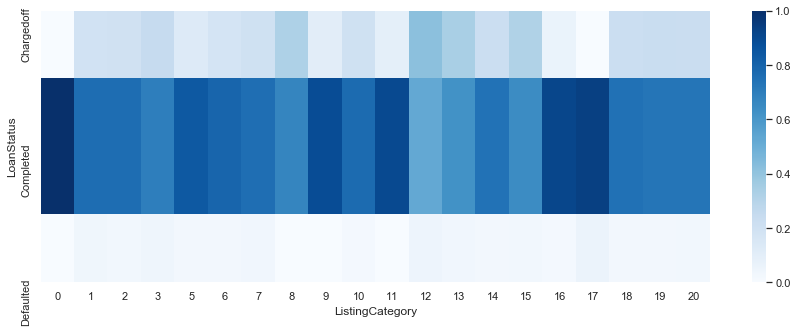

In [156]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(lprops, cmap="Blues")

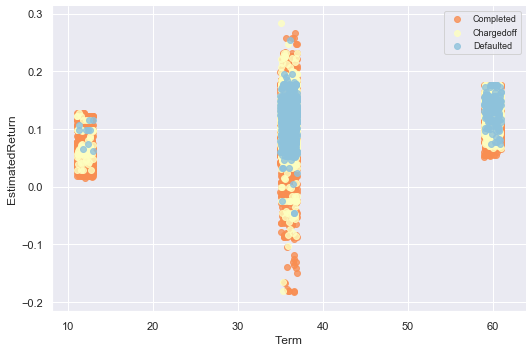

In [158]:
g = sns.FacetGrid(data = pl_df, hue = 'LoanStatus', hue_order = ['Completed','Chargedoff','Defaulted'], size = 5, aspect = 1.5, palette="RdYlBu")
g.map(sns.regplot,"Term", "EstimatedReturn", fit_reg = False, x_jitter=True);
plt.legend(loc=1, fontsize = 9)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

For Loans Status and Listing Category:
* 12: Green loans have the lowest Completion Rate but with 10/18 completions it is difficult to say whether the category is necessarily riskier than the others or whether it was just a new type by 2014.
* 16: Motorcycle loans have a particularly high completion rate with 86/94
Overall, we can see that for any category loans are completed more than half the time.

For Term, Estimated Return by Loan Status:
* 1-year loans have the lowest history of defaulting with reasonable returns peaking at about 10%
* 3-year loans have the widest range of expected returns, with more extreme rates seeming to have lower defaults historically.
* 5-year loans have higher returns on average than 1 year but at a much higher risk of default historically

For Borrower APR and Rating:
* The risk is dispersed amongst the expected returns.

## Explantory Analysis

### Prosper Forecastig based on Estimation

- Prosper bases its development on **estimated return**, which is assigned to the listing at the time it was created and it is the difference between the Estimated Effective Yield and the Estimated Loss Rate.

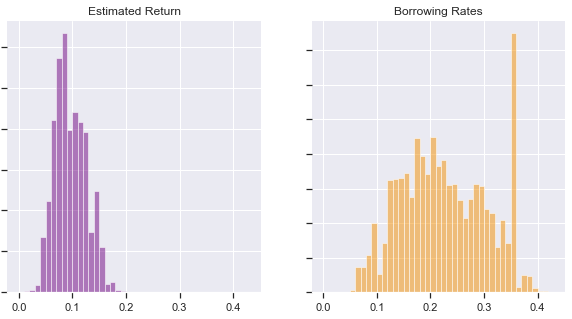

In [161]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

axes = [ax1,ax2]
positions=['right','left','top']
bin_edges1=np.arange(0,max(pl_df["BorrowerAPR"].dropna())+0.01,0.01)
ax1.hist(pl_df["EstimatedReturn"].dropna(), bins = bin_edges1, color = '#6f0382', alpha =0.5);

for ax in axes:
    ax.tick_params(left = 'off', bottom = 'off')
    for pos in positions:
        ax.spines[pos].set_visible(False)
    ax.set_yticklabels('')

ax1.set_title("Estimated Return")
ax2.set_title('Borrowing Rates')

bin_edges2=np.arange(0,max(pl_df["BorrowerAPR"])+0.01,0.01)
ax2.hist(pl_df["BorrowerAPR"], bins=bin_edges2, color = '#f28f02',alpha=0.5);


It is observable here that there is a disparity between the spread of borrowing rates and the spread of returns. As borrowing rates are determined by the riskiness of the investment, it is worth noting the distribution of risk amongst the loans listed.

### Prosper Customer Profile

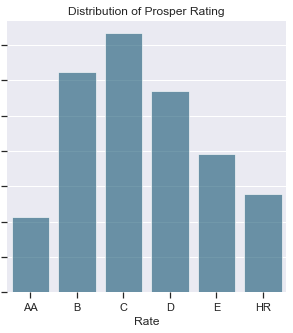

In [164]:
bars= ['AA','B','C','D','E','HR']
f, ax = plt.subplots(figsize=(5,5))

sns.countplot(data = pl_df, x = "ProsperRating", color = '#035a82', order = bars, alpha = 0.6)
sns.despine(left = True, bottom=True)
ax.tick_params(left = 'off', bottom = 'off')
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlabel("Rate")
ax.set_title("Distribution of Prosper Rating");

The distribution of risk follows a plausible bell-shaped curved. Some additional context could be provided by the fact that about 70% of the listings with reported income have stated earnings between  2,500€ - 8,000€ monthly. Hence, we can extrapolate that Prosper tends to attract middle-class borrowers.

### Categories are more likely to Default

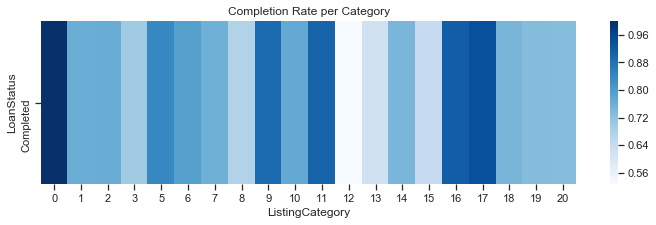

In [167]:
denom = finished_loans.groupby(['ListingCategory']).size()
lcounts =  finished_loans.groupby(["ListingCategory","LoanStatus"]).size()
lprops = lcounts / denom
lprops = lprops.reset_index(name='count')
lprops = lprops.pivot_table(index='LoanStatus',columns='ListingCategory',values = 'count', fill_value = 0)
lprops.drop(["Chargedoff","Defaulted"],inplace=True)
fig, ax = plt.subplots(figsize=(12,3))
sns.heatmap(lprops, cmap="Blues")
ax.tick_params(left = 'off', bottom = 'off')
ax.set_title("Completion Rate per Category");

12: Green loans have the lowest Completion Rate but with 10/18 completions it is difficult to say whether the category is necessarily riskier than the others or whether it was just a new type by 2014.

16: Motorcycle loans have a particularly high completion rate with 86/94

Overall, we can see that for any category loans are completed more than half the time.

###  Does Term length affects risk?

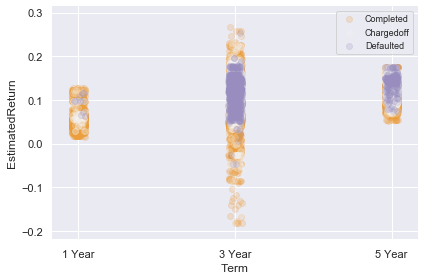

In [179]:
g = sns.FacetGrid(data = pl_df, hue = 'LoanStatus', hue_order = ['Completed','Chargedoff','Defaulted'], palette="PuOr",size = 4 , aspect = 1.5)
g.map(sns.regplot,"Term", "EstimatedReturn", fit_reg = False, x_jitter=True, scatter_kws={'alpha':0.2});
plt.legend(loc=1, fontsize = 9)
g.set(xticks=np.arange(12,84,24),xticklabels=["1 Year", "3 Year", "5 Year" ], alpha=0.0000)
sns.despine(left=True,bottom=True)

We can observe that 1-year loans have the lowest history of defaulting with reasonable returns peaking at about 10%; 3-year loans have the widest range of expected returns, with more extreme rates seeming to have lower defaults historically; lastly, 5-year loans have higher returns on average than 1 year but at a much higher risk of default historically

### Influence of Risk with Return

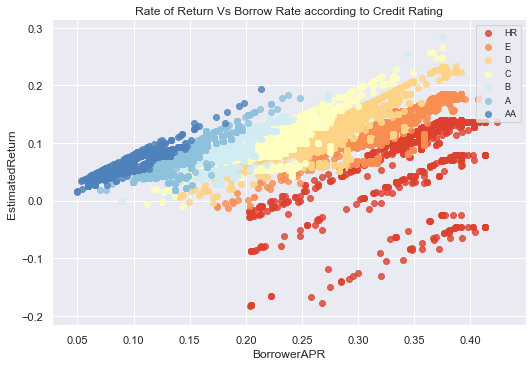

In [173]:
g = sns.FacetGrid(data = pl_df, hue = 'ProsperRating', hue_order = ['HR','E','D','C','B','A','AA'], size = 5, aspect = 1.5, palette="RdYlBu")
g.map(sns.regplot,"BorrowerAPR", "EstimatedReturn", fit_reg = False);
plt.legend(loc=1, fontsize = 9)
plt.title("Rate of Return Vs Borrow Rate according to Credit Rating");

The borrowing rates are determined according to the credit rating assigned by Proper, thus,  we can discern how the risk is dispersed amongst the expected returns. In particular, it resembles as an investor should have to tread very lightly with Borrowing APR's over 20% as there is a significantly larger chance of losing substantial portions of their investment.